In [8]:
# Import the necessary libraries
import pandas as pd
import warnings as w
w.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
# Read the file
df = pd.read_csv(r'C:\Users\pjbahaduri7\Desktop\Mall_Customers.csv')
df 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df = df.drop("CustomerID", axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [54]:
# to find the unique values present in each column attributes
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [55]:
# data cleaning - not required
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Label encoding the Gender attribute
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


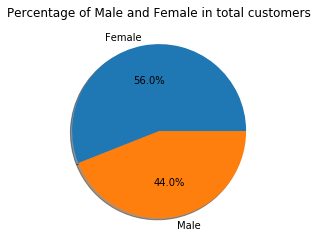

In [124]:
labels = ["Female","Male"]
values = df["Gender"].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title('Percentage of Male and Female in total customers')
plt.show()

Text(0.5, 1.0, 'Distribution plot of Spending score')

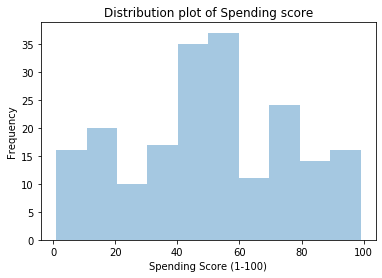

In [7]:
# Distribution plot
sns.distplot(df["Spending Score (1-100)"], bins=10, kde=False)
plt.ylabel('Frequency')
plt.title('Distribution plot of Spending score')

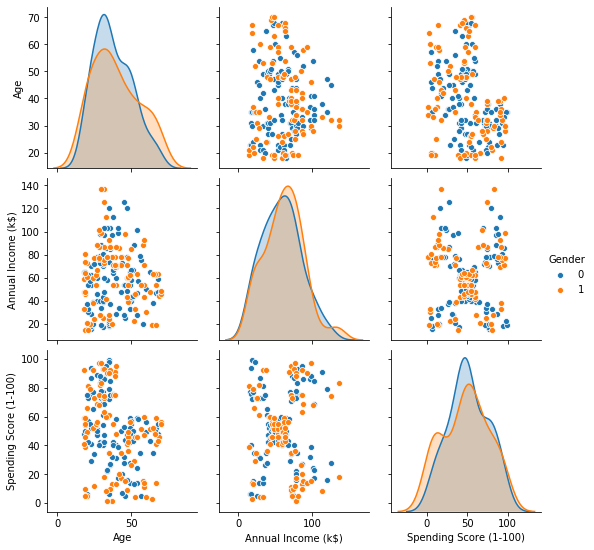

In [16]:
# Pair plot
sns.pairplot(df, hue='Gender')

Text(0.5, 1.0, 'Box plot of Age for different Annual income groups')

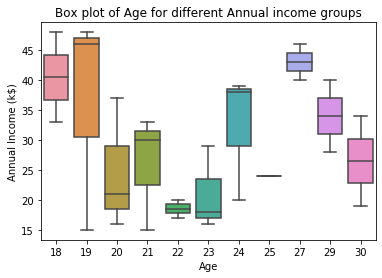

In [18]:
# Box plot
df = df[(df['Age'] <= 30) & (df['Annual Income (k$)'] <= 50)]
sns.boxplot('Age', 'Annual Income (k$)', data=df)
plt.title('Box plot of Age for different Annual income groups')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Annual Income (k$)')

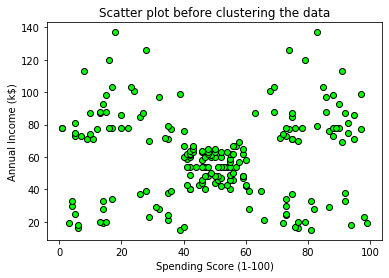

In [12]:
# Scatter plot before finding out the clusters
plt.scatter(df['Spending Score (1-100)'], df["Annual Income (k$)"], c=(0,1,0), edgecolors='black', alpha=1.0)
plt.title('Scatter plot before clustering the data')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [126]:
# Use of Elbow method to find the right number of clusters
sse = []
k_range = range(1,31)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)', 'Annual Income (k$)']])
    sse.append(km.inertia_)


Text(0.5, 1.0, 'Plot of Elbow method')

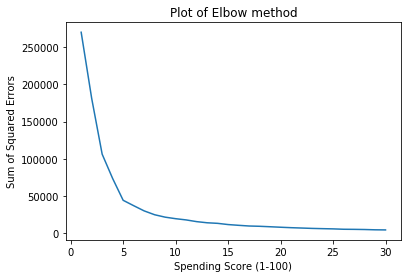

In [137]:
# Plotting the graph
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_range, sse)
plt.title('Plot of Elbow method')

In [13]:
# KMeans clustering 
km = KMeans(n_clusters = 5)
y_pred = km.fit_predict(df[['Spending Score (1-100)', 'Annual Income (k$)']])
y_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [14]:
df['clusters'] = y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,3
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3


In [15]:
# Finding out the clusters centers
cc = km.cluster_centers_
cc

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

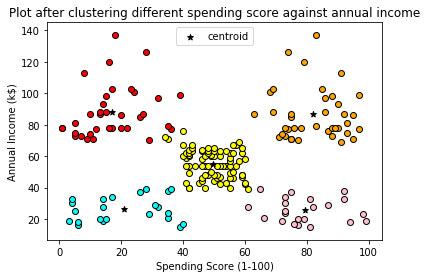

In [16]:
# Plotting the centroids on the scatter plot 
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]
c4 = df[df.clusters == 3]
c5 = df[df.clusters == 4]
plt.scatter(c1['Spending Score (1-100)'],c1['Annual Income (k$)'],color='red',edgecolors='black',alpha=1.0)
plt.scatter(c2['Spending Score (1-100)'],c2['Annual Income (k$)'],color='pink',edgecolors='black',alpha=1.0)
plt.scatter(c3['Spending Score (1-100)'],c3['Annual Income (k$)'],color='orange',edgecolors='black',alpha=1.0)
plt.scatter(c4['Spending Score (1-100)'],c4['Annual Income (k$)'],color='cyan',edgecolors='black',alpha=1.0)
plt.scatter(c5['Spending Score (1-100)'],c5['Annual Income (k$)'],color='yellow',edgecolors='black',alpha=1.0)
plt.scatter(cc[:,0],cc[:,1],color='black',marker='*',label='centroid')
plt.title('Plot after clustering different spending score against annual income')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()

In [17]:
km = KMeans(n_clusters=5)
km.fit(df[['Spending Score (1-100)','Annual Income (k$)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)